### Name: Anirban Naskar
### Roll : 251310602

# SPA611 Programming Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1. Verify that the mean of power is centered around the variance of the voltage.

In [11]:
#creating random noise signal that follows a normal distribution with mean at 0 volt and has a standard deviation of 1 
sigma = 1
samples = 10000

signal = np.random.normal(0, sigma, samples)

#computing the power
power = signal**2 

#computing the mean of power 
mean_power = np.mean(power)

#computing the variance of the signal 
sig_variance = np.var(signal)

#printing the results
print(f'Variance of the noise signal: {sig_variance} mV')
print(f'Mean of Power: {mean_power} mV')



Variance of the noise signal: 1.0035952027689956 mV
Mean of Power: 1.0037303889849396 mV


I first generated a random noise signals containing 10000 samples, being a noise signal we require that it follows a normal distribution with mean at 0 Volts. i chose the standard deviation to be 1. Then to compute the power of this signal i took the square of the signal, assuming the resistance value to be unity. 

$$P = \frac{V^2}{R}$$

I computed the mean of the noise signal and variance of the power and verified that they are approximately equal. 


## Q2. Consider cases of different RMS and plot their histograms.

RMS of a signal  is given by the relation;
$$RMS = \sqrt{\sigma^2 + \mu^2}$$

since we are dealing with noise that has mean $\mu = 0$ we get;
$$RMS = \sqrt{\sigma^2} = \sigma$$

Therefore, varying the RMS means varying the standard deviation $\sigma$

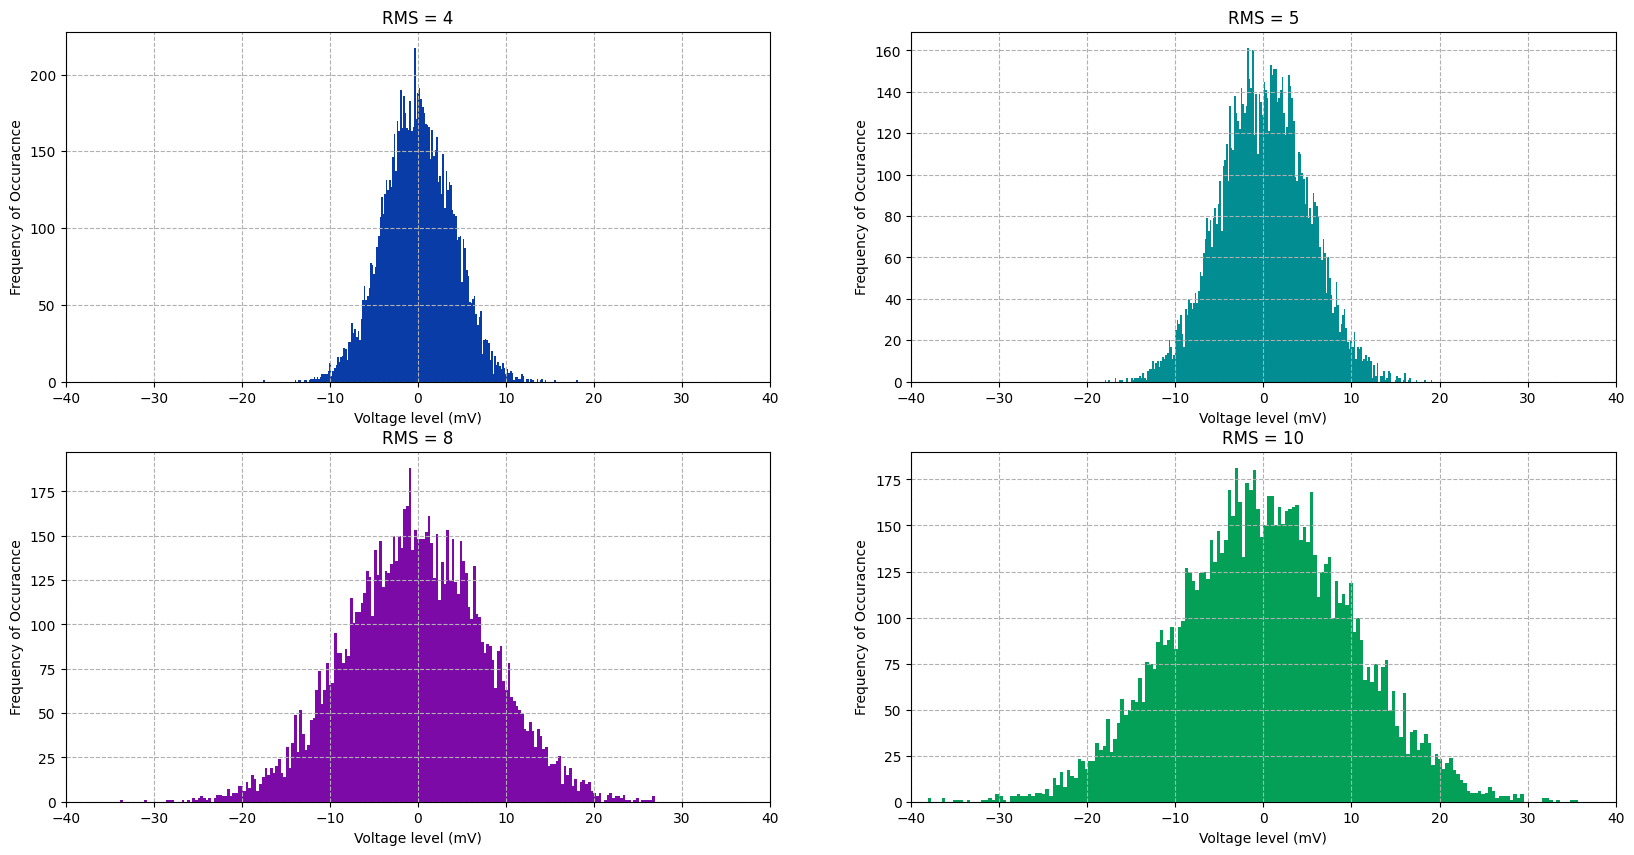

In [12]:
#creating an array containing a range of RMS/sigma values 

RMS = np.array([4, 5, 8, 10])

#number of sample points 
N = 10000

#generating signals with different RMS values
sig1 = np.random.normal(0, RMS[0], N)
sig2 = np.random.normal(0, RMS[1], N)
sig3 = np.random.normal(0, RMS[2], N)
sig4 = np.random.normal(0, RMS[3], N)

#plotting the results
fig, pl = plt.subplots(2, 2, figsize = (20, 10))

pl[0, 0].set_title(f'RMS = {RMS[0]}')
pl[0, 0].set_xlabel('Voltage level (mV)')
pl[0, 0].set_xlim(-40, 40)
pl[0, 0].set_ylabel('Frequency of Occuracnce')
pl[0, 0].hist(sig1, 200, color = "#0A3CA7")
pl[0, 0].grid(True, linestyle = '--')

pl[0, 1].set_title(f'RMS = {RMS[1]}')
pl[0, 1].set_xlabel('Voltage level (mV)')
pl[0, 1].set_xlim(-40, 40)
pl[0, 1].set_ylabel('Frequency of Occuracnce')
pl[0, 1].hist(sig2, 200, color = "#028D92")
pl[0, 1].grid(True, linestyle = '--')

pl[1, 0].set_title(f'RMS = {RMS[2]}')
pl[1, 0].set_xlabel('Voltage level (mV)')
pl[1, 0].set_xlim(-40, 40)
pl[1, 0].set_ylabel('Frequency of Occuracnce')
pl[1, 0].hist(sig3, 200, color = "#7B0AA7")
pl[1, 0].grid(True, linestyle = '--')

pl[1, 1].set_title(f'RMS = {RMS[3]}')
pl[1, 1].set_xlabel('Voltage level (mV)')
pl[1, 1].set_xlim(-40, 40)
pl[1, 1].set_ylabel('Frequency of Occuracnce')
pl[1, 1].hist(sig4, 200, color = "#05A058")
pl[1, 1].grid(True, linestyle = '--')


I first created an array of different RMS values and generated noise signals in with these values, now we plotted the histograms of these signals. Since in our case RMS is the same as standard deviation, higher RMS values mean broader distribution.

## Q3. How will the histogram change if I add a slowly varying sine wave in it?

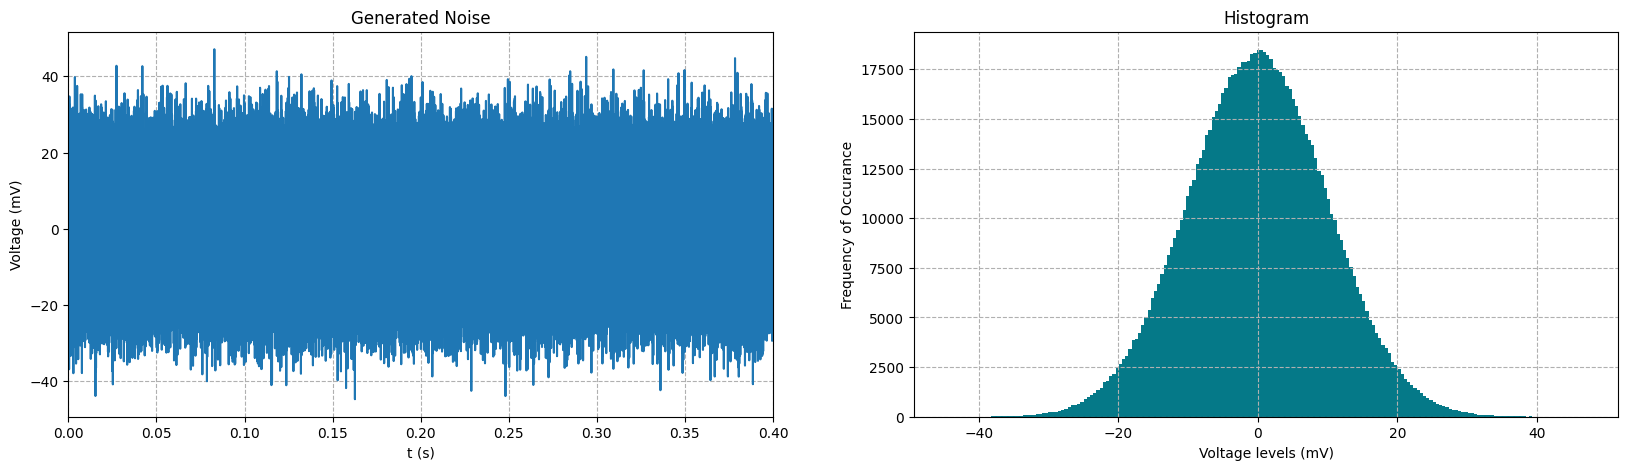

In [31]:
N = 10**6 #number of sample points

#generating a time array
t = np.linspace(0, 1, N) #start time 0 second, end time 1 second, sampling time step 10 micro second

#generating a random noise of standard deviation 10 within this time interval
sig = np.random.normal(0, 10, N)

#plotting the noise w.r.t. time
fig2, pl2 = plt.subplots(1, 2, figsize = (20, 5))

pl2[0].set_title('Generated Noise')
pl2[0].set_xlabel('t (s)')
pl2[0].set_xlim(0, 0.4)
pl2[0].set_ylabel('Voltage (mV)')
pl2[0].plot(t, sig)
pl2[0].grid(True, linestyle = '--')

pl2[1].set_title('Histogram')
pl2[1].set_xlabel('Voltage levels (mV)')
pl2[1].set_ylabel('Frequency of Occurance')
pl2[1].hist(sig, 200, color = "#057988")
pl2[1].grid(True, linestyle = '--')

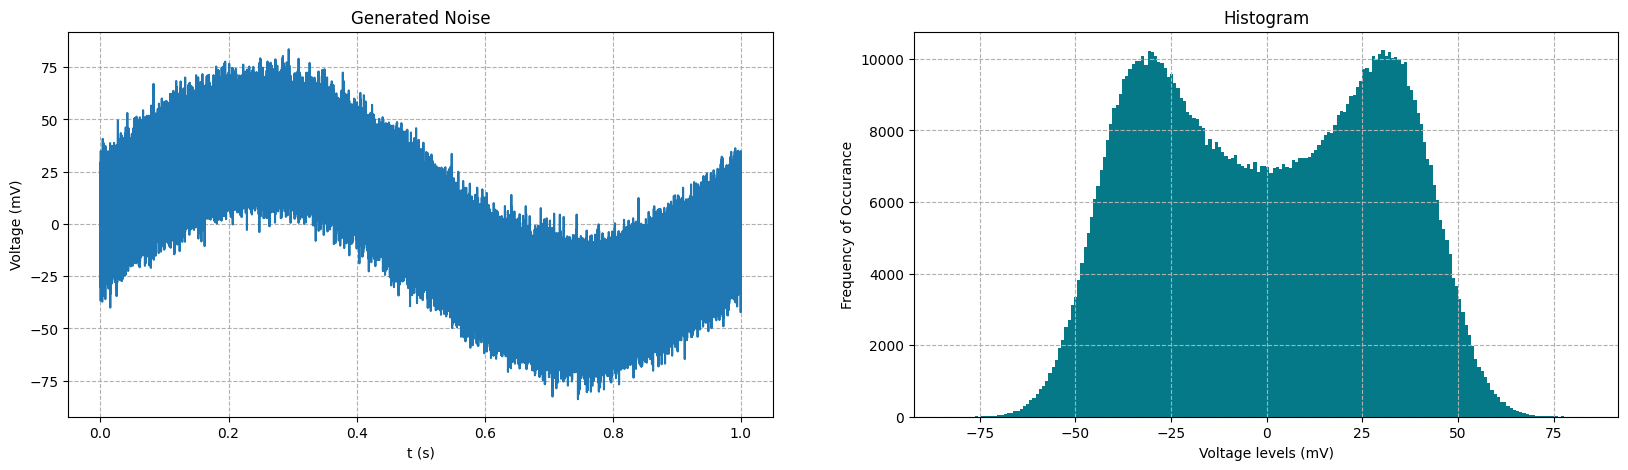

In [32]:
#creatinga slowly varying sine wave with max amplitude at 40 mv
f = 1
sin_sig = 40*np.sin(2*np.pi*f*t)

#adding this new signal to our noise
new_sig = sig + sin_sig

#plotting the new signal and its histogram

fig3, pl3 = plt.subplots(1, 2, figsize = (20, 5))

pl3[0].set_title('Generated Noise')
pl3[0].set_xlabel('t (s)')
pl3[0].set_ylabel('Voltage (mV)')
pl3[0].plot(t, new_sig)
pl3[0].grid(True, linestyle = '--')

pl3[1].set_title('Histogram')
pl3[1].set_xlabel('Voltage levels (mV)')
pl3[1].set_ylabel('Frequency of Occurance')
pl3[1].hist(new_sig, 200, color = "#057988")
pl3[1].grid(True, linestyle = '--')

I first generated a time array with 1 million points between an interval of [0, 1] second. Then I generated a random noise signal $(\sigma = 10 mV)$ within that time interval. Then I plotted the signal and its histogram. 

Next, I generated a sine wave with frequency of 1Hz and maximum amplitude of 40mv and added it to our noise signal. Plotting this new signal and its histogram reveals that the combined signal is a very noisy sine wave of same frequecny and the histogram got deformed into habing two lobes, hence having two means. 

## Q4. How are the Variances of the ensembles distributed ?

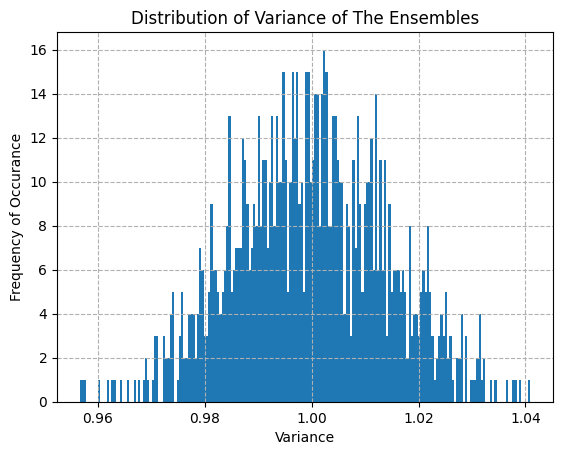

In [41]:
m = 1000 #number of realizations
N = 10000 #number of points per realizaton

#creating an array of realizations
rlzns = np.arange(m)

#creating an empty array to hold the varieance values
variance = []

#genearting a new noise signal per realization 
# and populating the variance array with the variance of the individual realizations
for i in rlzns:
    noise = np.random.normal(0, 1, N)
    variance.append(np.var(noise))

variance = np.array(variance)

#plotting the histogram of the variance
plt.title('Distribution of Variance of The Ensembles')
plt.xlabel('Variance')
plt.ylabel('Frequency of Occurance')
plt.hist(variance, 200)
plt.grid(True, linestyle = '--')



I generated 1000 realizations of noise signals with each realization containing 10000 data points per realization. I then computed the variance of each of these realizations and plotted their distribution. It turnes out that the distribution of these variances also seem to be normal distributions centered at $\sigma^2$ where $\sigma$ is the standard deviation of the noise signals we generated. 